<img src='images/logo.jpeg'>

<h1 align = center>Trabalho de Conclusão de Curso - Pós Graduação lato sensu - Big Data e Ciência de Dados</h2>

<h3 align = center>João Paulo Lemos Rodrigues - Outubro/2019</h3>

A partir dos preços históricos de algumas das principais ações(PETR4, ITUB4, VALE3 e BBDC4) da BOVESPA, para o calculo do indice sharpe, juntamente com a fronteira eficiente.<br>
O Índice de Sharpe – também conhecido apenas como Índice Sharpe (ou “Sharpe Ratio”, em inglês) – é um indicador utilizado para analisar o desempenho estatístico de fundos e carteiras.<br>
A sua grande função é traçar um paralelo entre o retorno e volatilidade da carteira analisada.<br>
O Índice de Sharpe foi criado para resolver um problema bastante comum no mercado financeiro: a tendência de observarmos apenas a rentabilidade dos ativos.<br>

In [1]:
#importando bibliotecas necessarias para resolução do problema
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importando os dados provenientes dos resultados das previsoões das redes neurais
df_PETR4 = pd.read_csv('data/PETR4.SA.csv') 
df_VALE3 = pd.read_csv('data/VALE3.SA.csv')
df_ITUB4 = pd.read_csv('data/ITUB4.SA.csv')
df_BBDC4 = pd.read_csv('data/BBDC4.SA.csv')

In [3]:
df_stocks = pd.concat([df_PETR4['Close'], df_VALE3['Close'], df_ITUB4['Close'], df_BBDC4['Close']], axis = 1)
df_stocks.columns = ['PETR4', 'VALE3', 'ITUB4', 'BBDC4']
df_stocks.tail()

,PETR4,VALE3,ITUB4,BBDC4
1240,27.549999,47.750000,35.029999,33.919998
1241,27.510000,47.709999,34.220001,33.459999
1242,26.719999,45.099998,33.279999,32.150002
1243,26.740000,45.439999,33.290001,32.240002
1244,26.420000,46.680000,33.450001,32.570000


In [4]:
selected = ['PETR4', 'ITUB4', 'VALE3', 'BBDC4']

# calcular retornos diários e anuais dos estoques
returns_daily = df_stocks.pct_change()
returns_annual = returns_daily.mean() * 250

# obter covariância diária dos retornos das ações
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [5]:
# listas vazias para armazenar retornos, volatilidade e pesos de carteiras imiginárias
port_returns = []
port_volatility = []
stock_weights = []

# numero de combinações e portifólios
num_assets = 4
num_portfolios = 8000

In [6]:
# preenchendo as listas vazias com cada retorno, peso e risco dos portifolios 
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [7]:
# dicionario para retoro e volatilidade de cada açao
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# estender o dicionário original para acomodar cada ticker e peso no portfólio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# criando dataframe a partir do dicionario
df = pd.DataFrame(portfolio)

# mudando as labels do dataframe
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# organizando colunas
df = df[column_order]

In [8]:
df.head()

,Returns,Volatility,PETR4 weight,ITUB4 weight,VALE3 weight,BBDC4 weight
0,0.184454,0.326107,0.128217,0.321233,0.108183,0.442367
1,0.163740,0.326686,0.252169,0.040391,0.554507,0.152933
2,0.175968,0.332620,0.260835,0.160577,0.201752,0.376835
3,0.161279,0.303035,0.032092,0.095964,0.562810,0.309135
4,0.173974,0.351881,0.380635,0.091341,0.255669,0.272354


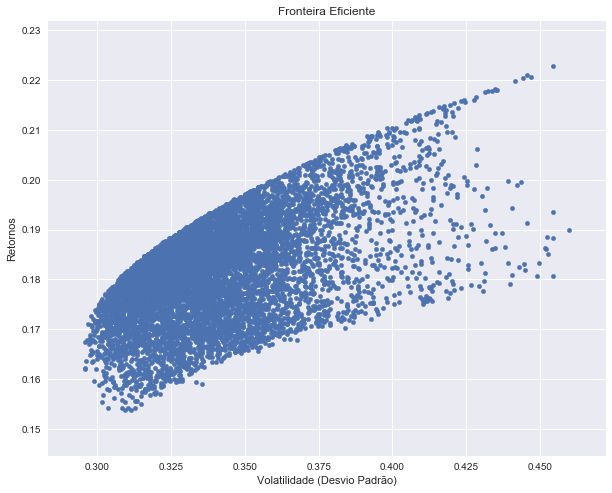

In [9]:
# plotando a fronteira eficiente
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade (Desvio Padrão)')
plt.ylabel('Retornos')
plt.title('Fronteira Eficiente')
plt.show()

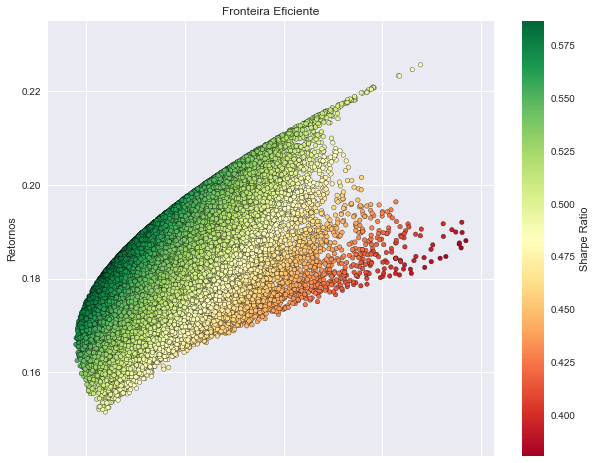

In [10]:
# calculando retornos diários
returns_annual = returns_daily.mean() * 250

# calculando covariancia diaria
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# listas vazias para armazenar valor
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# numero de açoes e de portifolios simulados
num_assets = len(selected)
num_portfolios = 50000

#random seed para permitir reproducibilidade
np.random.seed(101)

# populando listas vazias
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# dicionario para retornos, volatilidade e pesos
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

#  estender o dicionário original para acomodar cada ticker e peso no portfólio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# criando um dataframe a partir do dicionario
df = pd.DataFrame(portfolio)

# renomeando colunas
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# organizando colunas
df = df[column_order]

# plotando grafico
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade (Desvio Padrão)')
plt.ylabel('Retornos')
plt.title('Fronteira Eficiente')
plt.show()

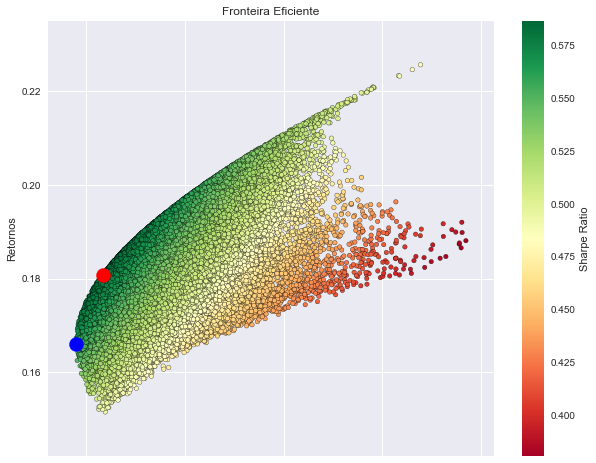

In [11]:
# buscando valores especificos
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# criando dois portifólios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plontando fronteira com pontos
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='o', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade (Desvio Padrão)')
plt.ylabel('Retornos')
plt.title('Fronteira Eficiente')
plt.show()

In [12]:
# configuração dos dois portifólios
min_variance_port

,Returns,Volatility,Sharpe Ratio,PETR4 Weight,ITUB4 Weight,VALE3 Weight,BBDC4 Weight
22191,0.165949,0.294759,0.563,0.004523,0.201323,0.765142,0.029012


In [13]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,PETR4 Weight,ITUB4 Weight,VALE3 Weight,BBDC4 Weight
22702,0.180851,0.308338,0.586537,0.001001,0.370992,0.460838,0.16717
